In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


<h1>EXTRAPOLATORY DATA ANALYSIS & DATA CLEANING</h1>

In [169]:
# .read_csv converts the document to an array
df=pd.read_csv('./dataset/penguins_lter.csv')

#removing unnecessary columns in dataframe which are not used in penguin classification

df = df.drop(['Comments', 'Region', 'Sample Number', 'studyName', 'Stage', 'Individual ID', 'Delta 15 N (o/oo)', 'Clutch Completion', 'Date Egg', 'Delta 13 C (o/oo)'], axis=1)

df['Species'] = df['Species'].replace({
    'Adelie Penguin (Pygoscelis adeliae)': 1,
    'Gentoo penguin (Pygoscelis papua)': 2,
    'Chinstrap penguin (Pygoscelis antarctica)': 3
})
# male-0 female-1

df['Sex'] = df['Sex'].replace({'MALE':0,'FEMALE':1})
df['Island'] = df['Island'].replace({'Torgersen':0,'Biscoe':1,'Dream':2})

print("DataFrame size:",np.shape(df)[0],"X",np.shape(df)[1])
df

DataFrame size: 344 X 7


,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,1,0,39.1,18.7,181.0,3750.0,0
1,1,0,39.5,17.4,186.0,3800.0,1
2,1,0,40.3,18.0,195.0,3250.0,1
3,1,0,NaN,NaN,NaN,NaN,NaN
4,1,0,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,2,1,NaN,NaN,NaN,NaN,NaN
340,2,1,46.8,14.3,215.0,4850.0,1
341,2,1,50.4,15.7,222.0,5750.0,0
342,2,1,45.2,14.8,212.0,5200.0,1


<h1>get information about data</h1>

In [170]:


# we can get a specific column using pandas

# There is no problem in our dataset (no empty columns)
# Now our task is to split data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    int64  
 1   Island               344 non-null    int64  
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 18.9+ KB


In [171]:
#get description of data
df.describe(include='all')
df['Island'].unique()

array([0, 1, 2], dtype=int64)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    int64  
 1   Island               344 non-null    int64  
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 18.9+ KB


<h1>After getting information about the dataframe we check NaN values in DataFrame using</h1>
- DataFrame.isna().sum()

In [173]:
df.isna().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [174]:
#removing rows containing NaN 
df=df.dropna()
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,1,0,39.1,18.7,181.0,3750.0,0
1,1,0,39.5,17.4,186.0,3800.0,1
2,1,0,40.3,18.0,195.0,3250.0,1
4,1,0,36.7,19.3,193.0,3450.0,1
5,1,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,1
340,2,1,46.8,14.3,215.0,4850.0,1
341,2,1,50.4,15.7,222.0,5750.0,0
342,2,1,45.2,14.8,212.0,5200.0,1


In [175]:
df['Sex'].unique()

array([0, 1, '.'], dtype=object)

In [176]:
#get unique values in every column of dataframe
for i in df:
    print(df[i].unique())
# Filter the dataframe where value of sex is not .
df=df[df['Sex']!='.']
# df    

[1 3 2]
[0 1 2]
[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2 46.1
 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6 46.7
 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5 50.8
 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8 43.5
 49.6 48.7 43.3 48.4 45.1 46.3 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.
 45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4 43.4 52.1
 44.5 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
[18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 21.1 19.  20.7 18.4 21.5
 18.3 19.2 18.1 17.2 18.9 18.6 17.9 16.7 17.  20.  18.5 19.1 19.7 16.9
 18.8 17.7 19.5

<h1>FILTERING OF DATA IS DONE</h1> 
- NOW WE VIEW GRAPHICAL REPRESENTATION OF DATA

[Text(0, 0, '146'), Text(0, 0, '119'), Text(0, 0, '68')]

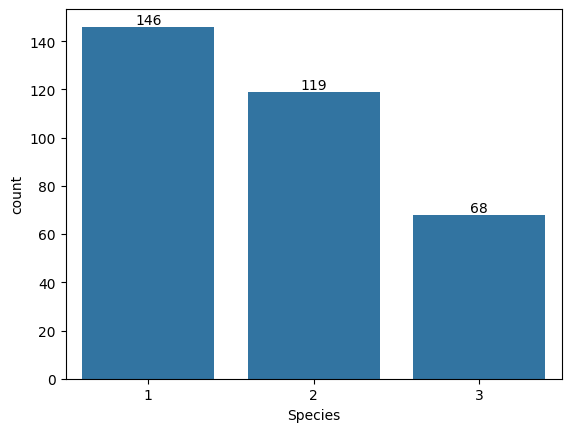

In [177]:
ax=sns.countplot(x='Species',data=df)
ax.bar_label(ax.containers[0])

[Text(0, 0, '47'), Text(0, 0, '163'), Text(0, 0, '123')]

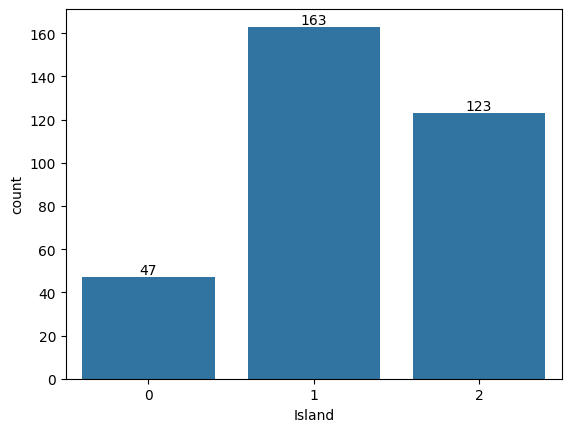

In [178]:
ax=sns.countplot(x='Island',data=df)
ax.bar_label(ax.containers[0])

                      Species    Island  Culmen Length (mm)  \
Species              1.000000  0.450097            0.777473   
Island               0.450097  1.000000            0.212038   
Culmen Length (mm)   0.777473  0.212038            1.000000   
Culmen Depth (mm)   -0.173789  0.189636           -0.228626   
Flipper Length (mm)  0.346061 -0.162739            0.653096   
Body Mass (g)        0.199259 -0.201966            0.589451   

                     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  
Species                      -0.173789             0.346061       0.199259  
Island                        0.189636            -0.162739      -0.201966  
Culmen Length (mm)           -0.228626             0.653096       0.589451  
Culmen Depth (mm)             1.000000            -0.577792      -0.472016  
Flipper Length (mm)          -0.577792             1.000000       0.872979  
Body Mass (g)                -0.472016             0.872979       1.000000  


<Axes: >

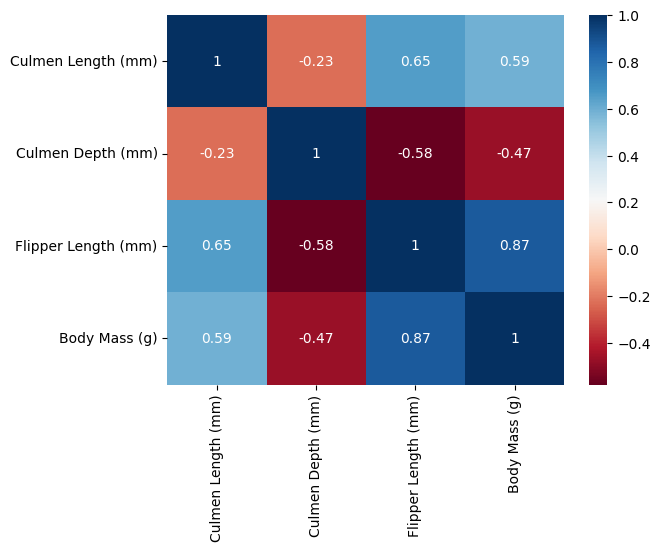

In [179]:
# Get a heat map with annotations
print(  df.corr(numeric_only=True))
sns.heatmap(df[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']].corr(),annot=True,cmap='RdBu')
# CONSIDER A FEATURE IN HEATMAP WHICH IS HIGHLY CORRELATED

<h1>We're done with the analysis of data</h1>
- Now we split data for training and testing for it we use sklearn

<u><strong>Note:</strong></u>
<h3>If your output (y) is a string and u don't encode the string, you'll face the following error</h3>
<img src="./screenshots/ValueError.jpg"/>

In [180]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.20)

train_x=train[['Island','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Sex']]
train_y=train[['Species']]

test_x=test[['Island','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Sex']]
test_y=test[['Species']]
test_x.info()
test_y.info()



<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 258 to 70
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               67 non-null     int64  
 1   Culmen Length (mm)   67 non-null     float64
 2   Culmen Depth (mm)    67 non-null     float64
 3   Flipper Length (mm)  67 non-null     float64
 4   Body Mass (g)        67 non-null     float64
 5   Sex                  67 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 258 to 70
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Species  67 non-null     int64
dtypes: int64(1)
memory usage: 1.0 KB


<h1>PICKING UP A MODEL WHICH CAN CLASSIFY THE PENGUIN</h1>
    <ul>
        <li>So the given problem is a classification problem</li>
        <li>Im going to use Random Forest Classifier because in this problem we classify which type of penguin it is.</li>
    </ul>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier


rfc=RandomForestClassifier()
rfc.fit(test_x,test_y)